# Point Cloud to Image Conversion
## Team LeakSeek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Filename Constants
MANIFOLD_PCD_PATH = 'manifold2.pcd.txt'
OUTPUT_IMG_NAME = 'converted_manifold.png'

In [3]:
# Note: The preliminary data in typical point cloud files (i.e., VERSION, FIELDS, ..., DATA) were manually removed and replaced
#   by the "x y z rgb" to define the df columns when CSV is read.
df_orig = pd.read_csv(MANIFOLD_PCD_PATH, sep=' ')
df_orig

,x,y,z,rgb
0,132.748410,-121.21973,827.99597,4279177485
1,133.288420,-121.31248,827.87292,4279243278
2,133.665440,-121.20355,827.87921,4279243277
3,134.240450,-121.32706,827.97693,4279243022
4,131.865200,-120.81913,827.76471,4279111692
...,...,...,...,...
51915,18.198826,144.31032,758.27460,4278978309
51916,18.680296,144.21672,758.23004,4278847236
51917,19.103804,144.28970,758.22913,4278781444
51918,19.533014,144.23735,758.27539,4278781444


In [4]:
# Extract rgb values into separate columns.
# Note: left most bits in rgb column are "alpha" values?
df = df_orig.copy()
df['color'] = df['rgb'].map(lambda rgb: "#{:02x}{:02x}{:02x}".format(rgb >> 16 & 0xff, rgb >> 8 & 0xff, rgb & 0xff))
df['color_rgb'] = df['rgb'].map(lambda rgb: "({}, {}, {})".format(rgb >> 16 & 0xff, rgb >> 8 & 0xff, rgb & 0xff))
df.head()

,x,y,z,rgb,color,color_rgb
0,132.74841,-121.21973,827.99597,4279177485,#0f110d,"(15, 17, 13)"
1,133.28842,-121.31248,827.87292,4279243278,#10120e,"(16, 18, 14)"
2,133.66544,-121.20355,827.87921,4279243277,#10120d,"(16, 18, 13)"
3,134.24045,-121.32706,827.97693,4279243022,#10110e,"(16, 17, 14)"
4,131.86520,-120.81913,827.76471,4279111692,#0e100c,"(14, 16, 12)"


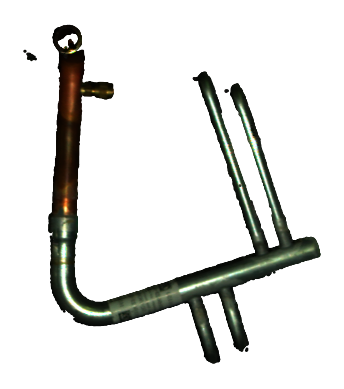

In [5]:
# Plot manifold in 2D.
fig, ax = plt.subplots() 
ax.scatter(df['x'], df['y'], s=1, c=df['color'])

# Ensure axes are equal.
# Otherwise, matplotlib will stretch/squish the image to fit the figure window.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html
ax.set_aspect('equal', 'box')

plt.axis('off')
plt.savefig(OUTPUT_IMG_NAME, bbox_inches='tight')
plt.show()